# creating own dataset

In [142]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=11)

In [143]:
import matplotlib.pyplot as plt

In [144]:
x

array([[ 0.23044585, -0.11697552],
       [-0.21762189, -0.73115232],
       [-0.323292  , -0.7081059 ],
       [-1.76069425, -2.01199214],
       [-0.1696411 ,  1.63493163],
       [-1.0022404 ,  0.15599044],
       [-1.96189932,  1.07782053],
       [ 0.1168591 ,  0.80626713],
       [-0.52745459,  0.74859527],
       [-2.12957181,  0.75152794],
       [-1.94811866, -0.90114581],
       [-1.94968772, -0.1815243 ],
       [ 0.00925689, -2.98092432],
       [ 0.83683271,  1.20500136],
       [-1.99684132,  0.78302407],
       [ 0.41850568,  0.42968688],
       [-0.10988828, -0.73229726],
       [-2.04938859, -0.83930476],
       [-0.15113071,  0.83727062],
       [-1.94042451, -0.10255323],
       [-2.44640947,  0.65867001],
       [-2.23502421,  0.92649819],
       [-1.48673469,  0.10216193],
       [ 1.64163099,  0.46886454],
       [-1.38633312,  0.45432938],
       [ 0.6451707 ,  1.8613386 ],
       [-1.95743875, -0.79255991],
       [-1.2113208 , -1.0004391 ],
       [-2.57050502,

In [145]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

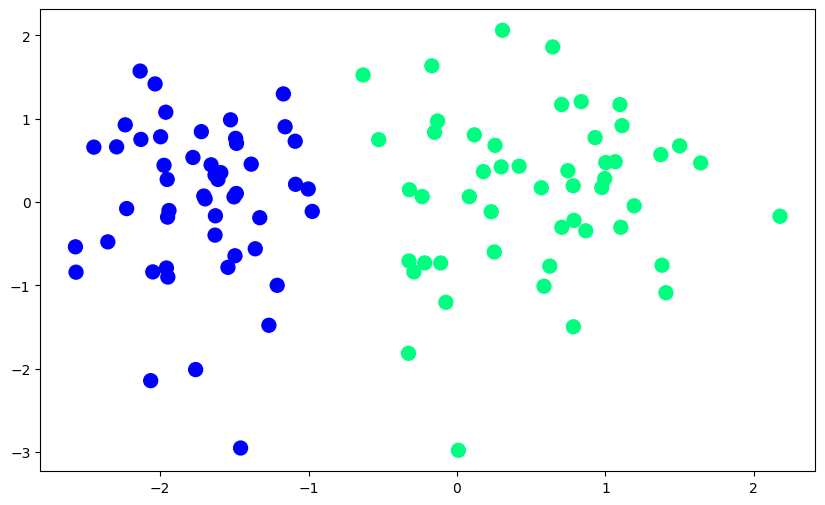

In [146]:
plt.figure(figsize=(10,6))
plt.scatter(x[: ,0 ],x[ : ,1], c=y,cmap='winter',s=100)
plt.show()

In [147]:
import random

In [159]:
def my_perceptron(x,y):
    #inserting bias term with value 1
    x=np.insert(x,0,1,axis=1)
    # initialize weights for all features and bias
    weights=np.ones(x.shape[1])
    # learning rate 
    lr=.1
    # running a loop for particular epochs
    for i in range(1000):
        # selecting a random point for prediction
        j=random.randint(0,99)
        # calculting y_hat using perceptron formula
        y_hat=activation_fn(np.dot(x[j],weights))
        # updating weights
        weights = weights + lr*(y[j]-y_hat)*x[j]
    # returning bises and weights
    return weights[0], weights[1:]

In [160]:
x[0]

array([ 0.23044585, -0.11697552])

In [161]:
# x=np.insert(x,0,1,axis=1)
# np.dot(x[0],[1,1,1])

In [162]:
def activation_fn(z):
    if z<0:
        return 0
    else:
        return 1

In [163]:
intercept_, coef_=my_perceptron(x,y)

In [164]:
print(coef_)
print(intercept_)

[1.38646522 0.1704854 ]
1.0


In [165]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [166]:
print(f'slope is {m}')
print(f'intercept is {b} ')

slope is -8.13245703142059
intercept is -5.865604785500749 


# plotting best line to seperate classes

In [167]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

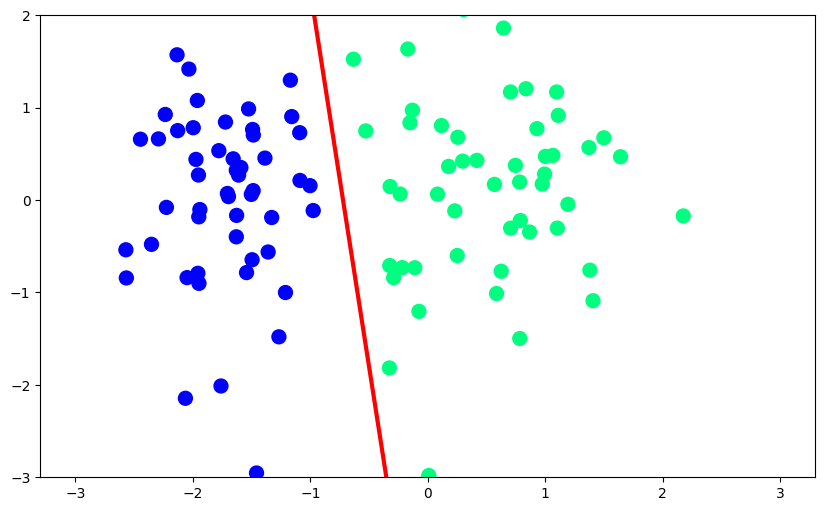

In [169]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

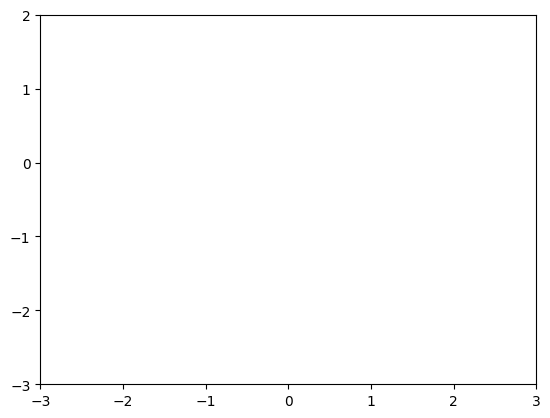

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Your existing data and functions (X, y, perceptron, etc.)

# Create a figure
fig, ax = plt.subplots()

# Set the x and y limits for your plot
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 2)

# Initialize an empty line for the animation
line, = ax.plot([], [], color='red', linewidth=3)

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame of the animation
def animate(i):
    m, b = my_perceptron(x, y)  # Recalculate m and b based on your data
    y_input = m * x_input + b
    line.set_data(x_input, y_input)
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)

# To display the animation in a Jupyter Notebook, you can use the following line:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# To save the animation as a video file (e.g., MP4):
# ani.save('perceptron_animation.mp4', writer='ffmpeg')

plt.show()
